In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# make the inline image outputs larger
mpl.rcParams['figure.figsize'] = (10,10)

Create some fake data

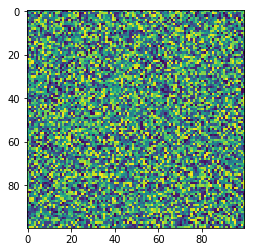

In [2]:
raster = np.random.rand(100,100)
raster = np.round(raster * 1000).astype(int)
plt.imshow(raster)

Initialize a new 2D array with the size of the number of points we are going to genereate (i.e., the sum of the values from all cells):

In [3]:
numpoints = np.sum(raster)
pointsX = np.zeros(numpoints)
pointsY = np.zeros(numpoints)

Next, we'll fill that new array up by adding *n* 2D points for every cell in the raster with value *n* 

In [4]:
point = 0
for r in range(0, raster.shape[0]):
    for c in range(0, raster.shape[1]):
        # create a n points for number n in the raster cell:
        for n in range(0, raster[r,c]):
            pointsX[point] = r
            pointsY[point] = c
            point = point + 1

How many points do we have now?

In [5]:
pointsX.size

5059572

Now we'll generate an array of random values in [-0.5,0.5] of the same size and add the two arrays to each other, essentially shifting around every point randomly within its cell:

In [6]:
seedX = np.random.rand(numpoints)
seedX = seedX - 0.5

seedY = np.random.rand(numpoints)
seedY = seedY - 0.5

In [7]:
pointsX = pointsX + seedX
pointsY = pointsY + seedY

Create matplotlib scatterplot

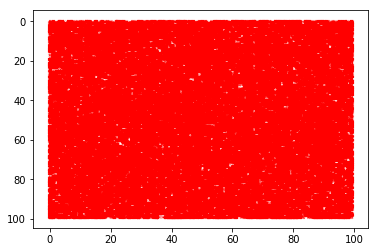

In [10]:
plt.scatter(pointsX, pointsY, s=0.01, marker=".", color="red", alpha=0.5)
plt.gca().invert_yaxis() # origin top left, as in original image
plt.show()

Try the same with [Bokeh](https://bokeh.pydata.org/en/latest/docs/gallery/color_scatter.html):

In [11]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook # to show the plot inline
output_notebook()

Loading BokehJS ...

In [12]:
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(pointsX, pointsY, radius=0.01,
          fill_alpha=0.6,
          line_color=None)

show(p)